# Análise Descritiva

O objetivo deste documento é apresentar uma análise descritiva de algumas das principais variáveis para uma melhor compreensão do problema, que é o estudo das variáveis e de como elas influenciam o preço do veículo. Serão apresentadas seções para distribuições de frequência, gráficos univariados e bivariados, medidas de posição e dispersão, assim como as interpretações dos resultados obtidos.  Para evitar um volume desnecessário neste documento, apenas três variáveis serão analisadas, elas são `ano de fabricação`, `marca` e `preço`, todos os resultados são reproduzíveis para as demais variáveis.

Leitura do arquivo e importação de pacotes

In [1]:
import pandas as pd
df = pd.read_csv('./cars_train.csv', encoding='utf-16', sep='\t')

In [2]:
df.head(3)

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472


A variável `id` não possui relevância para as análises e não fornece informações significativas sobre o problema em questão, é possível descartá-la da análise. 

In [3]:
df.drop(['id'], axis=1, inplace=True)

Separando as variáveis quantitativas e qualitativas.

In [4]:
df_quali  = df.select_dtypes(exclude=['number'])
df_quanti = df.select_dtypes(include=['number'])
display(df_quali.head(2))
display(df_quanti.head(2))

,marca,modelo,versao,cambio,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,...,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda
0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,CVT,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),...,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN
1,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,Automática,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),...,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN


,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,veiculo_alienado,preco
0,8.0,2017,2017.0,67772.0,4,NaN,74732.590084
1,8.0,2017,2017.0,62979.0,4,NaN,81965.332634


## Distribuição de frequências.

In [5]:
def frequencyDistribution(data, colums: list = None, type: str = 'quali', n: bool =True, bins: int = 10):
    """
    ------
    This function prints the frequency distribution of quantitative and qualitative variables in a table Variable | Frequency.
    ------
    Args:
        data: It is necessary to pass a standard pandas DataFrame of type: pandas.core.frame.DataFrame.
        colums: Inform which column you want to analyze the frequency, you can pass more than one column, however, both must be of the same type.
        type: Type of columns quantitative('quanti'), qualitative('quali').
        n: Inform whether or not the data should be normalized, the default is True.
        bins: For continuous quantitative variables you can define the amount of intervals you want to see the frequency, the default is 10.
    ------
    Returns:
        This function is of type void, it does not return anything, it just displays the frequencies.
    ------

    Examples:
        >>> frequency_distribution(dataset, colums=['column_1'],type='quanti', n=True)
    ------
    """
    for cl in colums:
        if type == 'quali':
            display(data[cl].value_counts(normalize = n).reset_index(name='Frequency').rename(columns={'index':cl}))
        elif type == 'quanti': 
            display(data[cl].value_counts(normalize = n, bins=bins).reset_index(name='Frequency').rename(columns={'index':cl}))

Verificando a frequência dos preços, observa-se que a maioria dos carros possui valores abaixo de R$ 144.864,245.

In [6]:
frequencyDistribution(df_quanti, colums=['preco'], type='quanti', bins=10)

,preco,Frequency
0,"(8520.007, 144864.245]",0.665900
1,"(144864.245, 279858.539]",0.276230
2,"(279858.539, 414852.833]",0.049554
3,"(414852.833, 549847.127]",0.006152
4,"(549847.127, 684841.421]",0.001555
5,"(684841.421, 819835.716]",0.000304
6,"(954830.01, 1089824.304]",0.000101
7,"(819835.716, 954830.01]",0.000068
8,"(1089824.304, 1224818.598]",0.000068
9,"(1224818.598, 1359812.892]",0.000068


Ao verificar a frequência das marcas dos carros, observamos que a marca com maior ocorrência na lista é a VOLKSWAGEN.

In [7]:
frequencyDistribution(df_quali, colums=['marca'])

,marca,Frequency
0,VOLKSWAGEN,0.155287
1,CHEVROLET,0.102082
2,TOYOTA,0.073688
3,HYUNDAI,0.069058
4,JEEP,0.067604
5,FIAT,0.064832
6,BMW,0.060303
7,AUDI,0.057396
8,PEUGEOT,0.056618
9,HONDA,0.053610


Ao analisar as datas de fabricação desses veículos, podemos observar que a maioria deles foi fabricada no intervalo de 2014 a 2022. A segunda maior frequência ocorre entre os anos de 2007 a 2014. Isso significa que mais de 95% dos carros listados foram fabricados após o ano de 2007.

In [8]:
frequencyDistribution(df_quanti, colums=['ano_de_fabricacao'], type='quanti', bins=5)

,ano_de_fabricacao,Frequency
0,"(2014.6, 2022.0]",0.778259
1,"(2007.2, 2014.6]",0.186925
2,"(1999.8, 2007.2]",0.022107
3,"(1992.4, 1999.8]",0.011662
4,"(1984.962, 1992.4]",0.001048


## Gráficos

Os resultados mostrados ficam mais evidentes quando visualizados graficamente.

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

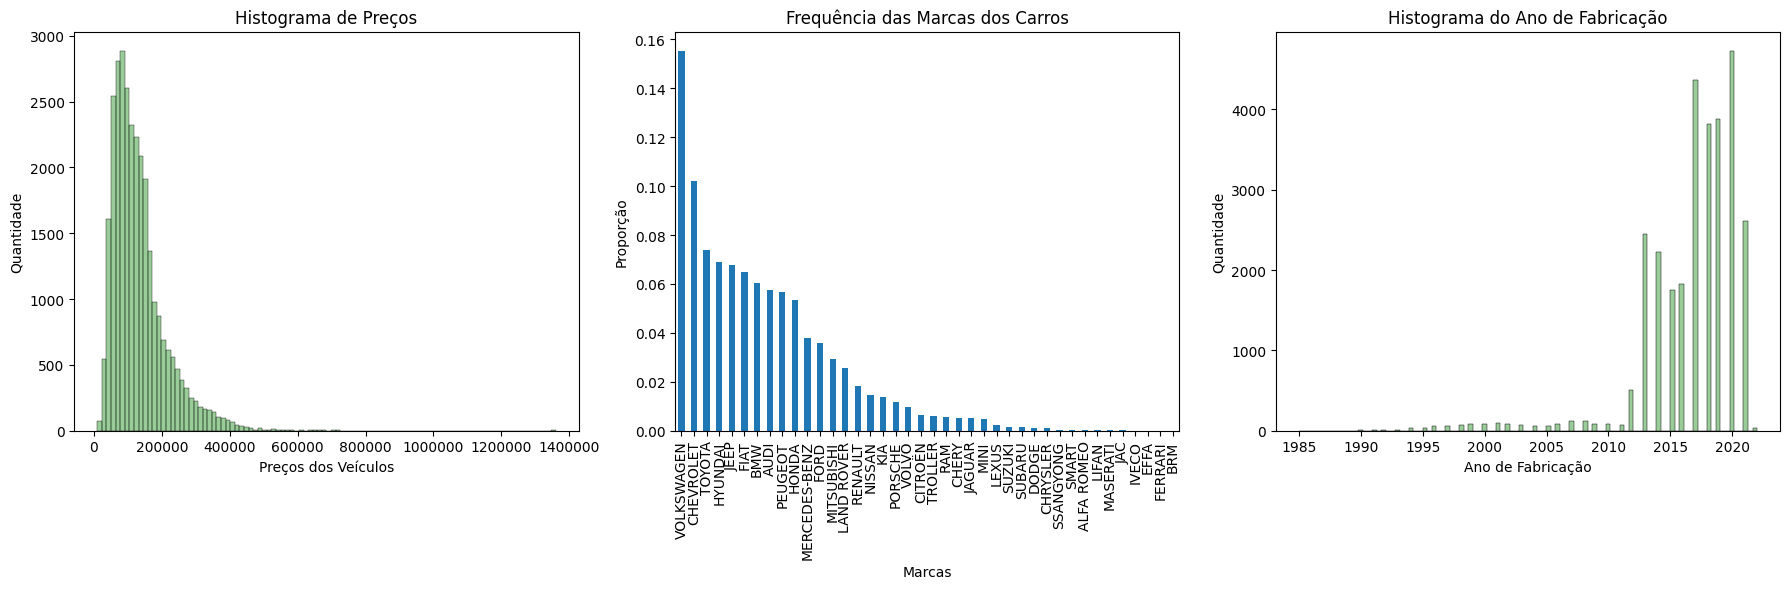

In [17]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_quanti['preco'], color='g', bins=100, alpha=0.4)
plt.xlabel('Preços dos Veículos')
plt.ylabel('Quantidade')
plt.title('Histograma de Preços')
plt.ticklabel_format(style='plain', axis='x') 
plt.tight_layout()

plt.subplot(1, 3, 2)
value_counts = df_quali['marca'].value_counts(normalize=True)
value_counts.plot(kind='bar')
plt.xlabel('Marcas')
plt.ylabel('Proporção')
plt.title('Frequência das Marcas dos Carros')
plt.tight_layout()

plt.subplot(1, 3, 3)
sns.histplot(df_quanti['ano_de_fabricacao'], color='g', bins=100, alpha=0.4)
plt.xlabel('Ano de Fabricação')
plt.ylabel('Quantidade')
plt.title('Histograma do Ano de Fabricação')
plt.tight_layout()

plt.show()


A análise bivariada é interessante para observar as relações entre as variáveis entre si. Serão testadas as relações entre as demais variáveis e a variável preço.

O gráfico abaixo mostra que todos os carros com valores acima de 400 mil foram fabricados após 2010.

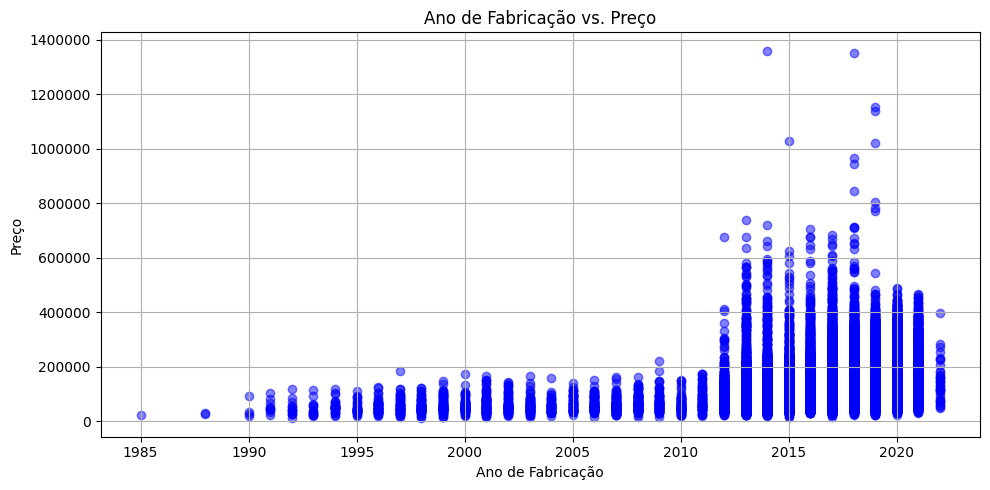

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_quanti['ano_de_fabricacao'], df_quanti['preco'], color='b', alpha=0.5)
ax.set_title('Ano de Fabricação vs. Preço')
ax.set_xlabel('Ano de Fabricação')
ax.set_ylabel('Preço')
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(True)
plt.tight_layout()
plt.show()


Podemos ver abaixo que algumas marcas influenciam nos preços dos carros e que, embora a marca VOLKSWAGEN seja a mais frequente, ela não é a que apresenta os maiores preços.

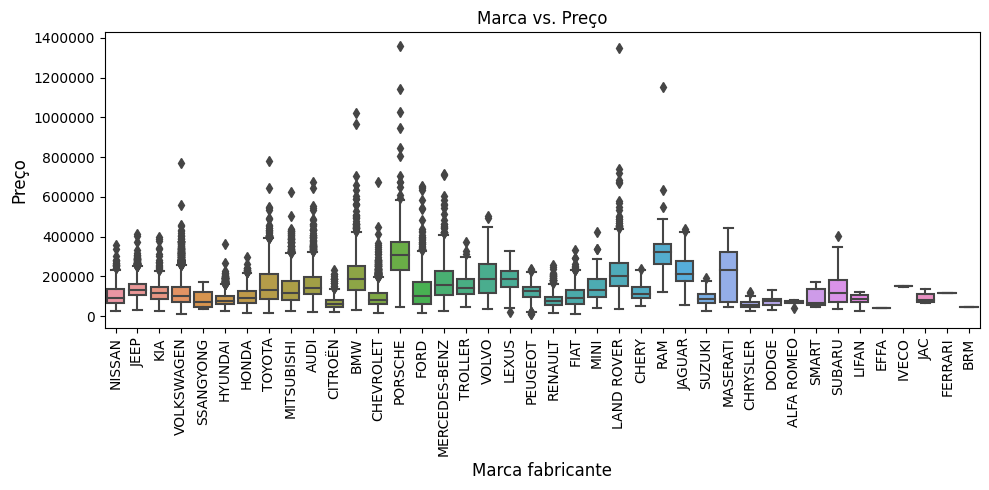

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Marca vs. Preço", fontsize=12)
sns.boxplot(data=df, x="marca", y="preco", ax=ax)
ax.set_ylabel("Preço", fontsize=12)
ax.set_xlabel("Marca fabricante", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

## Medidas de posição e dispersão

In [23]:
def measuresOfPositionAndDispersion(data,key):
    import statistics as st
    """
    ------
    This function returns mean, mode, and median position measurements and measures of variance, standard deviation, and amplitude dispersion.
    ------
    Returns:
        Pandas DataFrame with position, mean, mode czuber and median measurements and variance, standard deviation and range dispersion measures.
    ------
    Examples:
        >>> measuresOfPositionAndDispersion(data['column'], Name)
    """
    
    dataset = pd.DataFrame({"Variable": key ,"Amount": len(data),"Mean": [st.mean(data.dropna())], "Mode ": st.mode(data.dropna()), "Median": [st.median(data.dropna())], "Variance": [st.variance(data.dropna())], "Standard deviation": [st.stdev(data.dropna())], "Amplitude": [max(data.dropna()) - min(data.dropna())]})
    return dataset

Para a variável `preco`, é observado que as medidas de tendência central estão próximas, com uma distância maior em relação à moda. No entanto, ainda estão relativamente próximas, considerando o valor alto da variância e do desvio padrão. Isso sugere que os valores de preço tendem a se concentrar em torno de uma média, mas também apresentam uma dispersão considerável em relação a essa média. Uma observação é que o preço é uma variável quantitativa contínua, logo a moda simples não é adequada para descrevê-la a utilização da moda czuber seria mais indicada.

In [30]:
display(measuresOfPositionAndDispersion(df_quanti['preco'], 'Preço'))

,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,Preço,29584,133023.87988,74732.590084,114355.796998,6.668825e+09,81662.872247,1.349943e+06


Para a variável `ano_de_fabricacao`, também é observado que as medidas de posição (como a média e a mediana) estão próximas, sugerindo uma concentração dos anos em torno desses valores. No entanto, é importante notar que o desvio padrão é alto, com um valor de 4 para a variável "ano". Isso indica que os anos de fabricação ainda apresentam uma certa dispersão em relação à média, apesar da concentração em torno dela.

In [29]:
display(measuresOfPositionAndDispersion(df_quanti['ano_de_fabricacao'], 'Ano de fabricação'))

,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,Ano de fabricação,29584,2016.758552,2020,2018.0,16.503273,4.062422,37
